In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="white")
sns.set_context("talk")

In [2]:
df = pd.read_csv('raw/2016-17-ClassCentral-Survey-data-noUserText.csv', decimal=',', encoding = "ISO-8859-1")

In [3]:
reason = df[['Which region of the world are you in?', 'Reasons: Learning skills for current career',
               'Reasons: Learning skills for new career', 'Reasons: School credit', 'Reasons: Personal interest',
               'Reasons: Access to reference materials']]
reason.head()                

,Which region of the world are you in?,Reasons: Learning skills for current career,Reasons: Learning skills for new career,Reasons: School credit,Reasons: Personal interest,Reasons: Access to reference materials
0,United Kingdom,0,0,0,1,0
1,Western Europe (except UK),1,1,0,1,0
2,Eastern Europe,0,1,0,1,0
3,United States,0,0,0,1,0
4,NaN,0,0,0,1,0


In [4]:
multi_reason = pd.melt(reason, id_vars='Which region of the world are you in?', 
                       var_name='select', value_name='score')
multi_reason.head()

,Which region of the world are you in?,select,score
0,United Kingdom,Reasons: Learning skills for current career,0
1,Western Europe (except UK),Reasons: Learning skills for current career,1
2,Eastern Europe,Reasons: Learning skills for current career,0
3,United States,Reasons: Learning skills for current career,0
4,NaN,Reasons: Learning skills for current career,0


In [5]:
grouped_reason = multi_reason.groupby(['Which region of the world are you in?', 'select'], as_index=False).sum()
grouped_reason.head()

,Which region of the world are you in?,select,score
0,Africa,Reasons: Access to reference materials,64
1,Africa,Reasons: Learning skills for current career,164
2,Africa,Reasons: Learning skills for new career,156
3,Africa,Reasons: Personal interest,149
4,Africa,Reasons: School credit,38


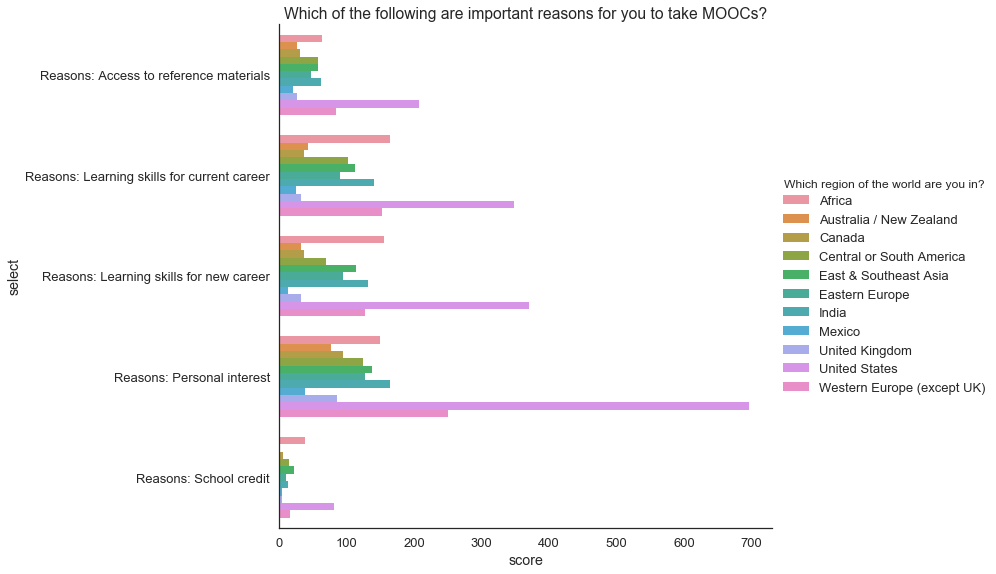

In [6]:
    sns.factorplot(x='score', y='select', hue='Which region of the world are you in?', 
                   data=grouped_reason, kind='bar', size=8, aspect=1.5)
    sns.plt.title('Which of the following are important reasons for you to take MOOCs?')
    sns.plt.show()

### Why are Latin Americans taking MOOCs?

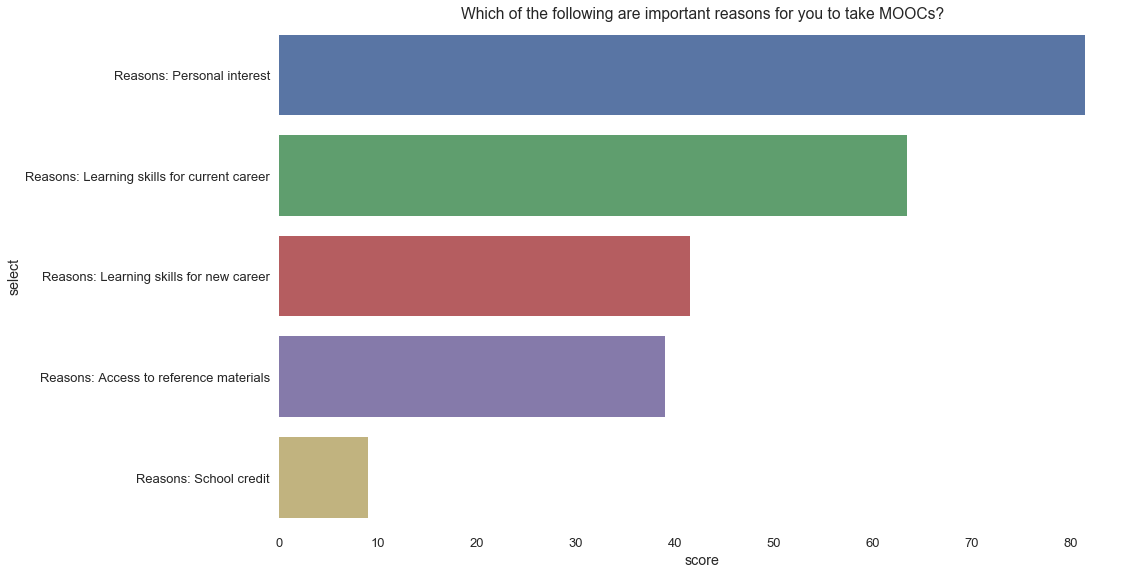

In [7]:
    mask_latin_america = (grouped_reason['Which region of the world are you in?'] == 'Central or South America') | \
    (grouped_reason['Which region of the world are you in?'] =='Mexico')
    sns.factorplot(x='score', y='select', hue=None, 
                   data=grouped_reason[mask_latin_america].sort_values('score', ascending=False), ci=None, 
                   kind='bar', size=8, aspect=2)
    sns.plt.title('Which of the following are important reasons for you to take MOOCs?')
    sns.despine(left=True, bottom=True)
    sns.plt.show()